## Proyek Analisis Data: Bike Sharing Dataset

- **Nama: Azarya Paska Saputra**
- **Email: azpaska@gmail.com**
- **ID Dicoding: azpaska**

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan pola penyewaan antara hari libur dan hari kerja?
- Bagaimana pengaruh setiap jenis cuaca terhadap jumlah total penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
bike_df = pd.read_csv("data/hour.csv")

In [3]:
bike_df.head() # menampilkan 5 baris pertama dari DataFrame hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
bike_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
bike_df.duplicated().sum()

0

In [7]:
bike_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Setelah dilakukan pengecekan, data didapati sudah bersih dan tidak ada masalah.

## Exploratory Data Analysis (EDA)

In [9]:
bike_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Melihat jumlah penyewa di hari kerja dan hari libur**

- 0: Hari Kerja
- 1: Hari Libur

In [10]:
bike_df.groupby(by="workingday").agg({
    "cnt": "sum"
}).sort_values(by=("workingday"), ascending=False)

,cnt
workingday,
1,2292410
0,1000269


**Melihat jumlah penyewa di tiap cuaca**

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [11]:
bike_df.groupby(by="weathersit").agg({
    "workingday": "count",
    "windspeed": ["max", "min", "mean", lambda x: x.max() - x.min()]
}).sort_values(by=("workingday", "count"), ascending=False)

workingday windspeed                             
                count       max     min      mean <lambda_0>
weathersit                                                  
1               11413    0.8060  0.0000  0.190553     0.8060
2                4544    0.7164  0.0000  0.179973     0.7164
3                1419    0.8507  0.0000  0.218825     0.8507
4                   3    0.3284  0.0896  0.204000     0.2388

In [12]:
bike_df.groupby(by="season").cnt.nunique()

season
1    482
2    721
3    760
4    690
Name: cnt, dtype: int64

In [13]:
columns = ["holiday" 
 ,"weekday","workingday","weathersit","temp","atemp","season", "windspeed",  "cnt"]
correlation = bike_df[columns].corr()
print(correlation)

             holiday   weekday  workingday  weathersit      temp     atemp  \
holiday     1.000000 -0.102088   -0.252471   -0.017036 -0.027340 -0.030973   
weekday    -0.102088  1.000000    0.035955    0.003311 -0.001795 -0.008821   
workingday -0.252471  0.035955    1.000000    0.044672  0.055390  0.054667   
weathersit -0.017036  0.003311    0.044672    1.000000 -0.102640 -0.105563   
temp       -0.027340 -0.001795    0.055390   -0.102640  1.000000  0.987672   
atemp      -0.030973 -0.008821    0.054667   -0.105563  0.987672  1.000000   
season     -0.009585 -0.002335    0.013743   -0.014524  0.312025  0.319380   
windspeed   0.003988  0.011502   -0.011830    0.026226 -0.023125 -0.062336   
cnt        -0.030927  0.026900    0.030284   -0.142426  0.404772  0.400929   

              season  windspeed       cnt  
holiday    -0.009585   0.003988 -0.030927  
weekday    -0.002335   0.011502  0.026900  
workingday  0.013743  -0.011830  0.030284  
weathersit -0.014524   0.026226 -0.142426  

## Visualization & Explanatory Analysis

### Bagaimana perbedaan pola penyewaan antara hari libur dan hari kerja?

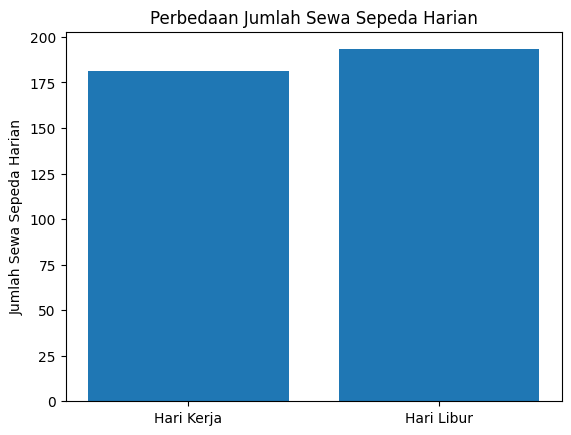

In [42]:
day_data = bike_df.groupby('workingday')['cnt'].mean()
day_names = ['Hari Kerja', 'Hari Libur']
plt.bar(day_names, day_data)
plt.title("Perbedaan Jumlah Sewa Sepeda Harian")
plt.ylabel("Jumlah Sewa Sepeda Harian")
plt.show()

Terlihat perbedaan signifikan dalam pola penyewaan sepeda antara hari libur dan hari kerja, dengan jumlah penyewaan cenderung lebih tinggi pada hari libur.

### Bagaimana pengaruh setiap jenis cuaca terhadap jumlah total penyewaan sepeda?

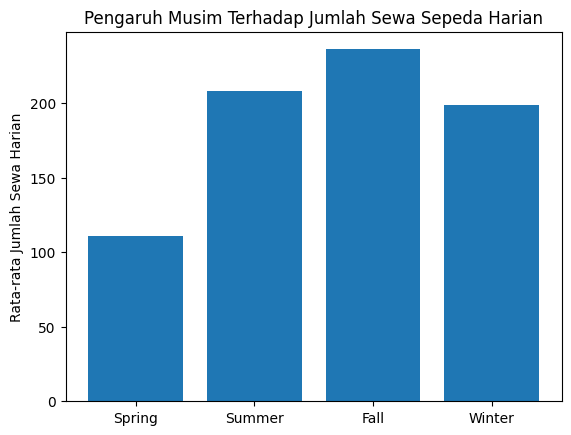

In [43]:
seasonal_data = bike_df.groupby('season')['cnt'].mean()
season_names = ['Spring', 'Summer', 'Fall', 'Winter']
plt.bar(season_names, seasonal_data)
plt.ylabel('Rata-rata Jumlah Sewa Harian')
plt.title('Pengaruh Musim Terhadap Jumlah Sewa Sepeda Harian')
plt.show()

Terlihat bahwa puncak jumlah penyewaan sepeda harian terjadi pada musim gugur, diikuti oleh musim panas, musim semi, dan musim salju.

## Conclution

### 1. Bagaimana perbedaan pola penyewaan antara hari libur dan hari kerja?

Dari analisis yang telah dilakukan terlihat perbedaan signifikan dalam pola penyewaan sepeda antara hari libur dan hari kerja, dengan jumlah penyewaan cenderung lebih tinggi pada hari libur. Strategi untuk meningkatkan efektivitas layanan bike sharing dapat berupa penyesuaian penyediaan sepeda dan penawaran khusus di hari kerja. Dengan mengadopsi strategi ini, layanan bike sharing dapat memanfaatkan lonjakan permintaan pada hari-hari libur dan meningkatkan penggunaan secara keseluruhan.

### 2. Bagaimana pengaruh setiap jenis cuaca terhadap jumlah total penyewaan sepeda?


Dari analisis yang telah dilakukan terlihat bahwa puncak jumlah penyewaan sepeda harian terjadi pada musim gugur, diikuti oleh musim panas, musim semi, dan musim salju. Saran strategis untuk meningkatkan penggunaan layanan bike sharing meliputi penyesuaian kapasitas sepeda, strategi promosi yang disesuaikan dengan musim, dan pengembangan program khusus sesuai dengan preferensi pengguna pada musim tertentu. Dengan memperhitungkan tren musiman, layanan bike sharing dapat meningkatkan penggunaan dan kepuasan pengguna secara keseluruhan.